In [ ]:
'''
    # Description the dataset 
        * This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. 
        * The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. 
        * A new directory containing 33 test images is created later for prediction purpose.
'''

In [1]:
# important Library3
import os
import cv2
import random
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten , BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Path the image
train_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [3]:
# read the image in path and make encoder of label and resize the image of 224 * 224
train = image_dataset_from_directory(train_path,image_size=(224,224),label_mode='categorical')
valid = image_dataset_from_directory(valid_path,image_size=(224,224),label_mode='categorical')

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [4]:
# from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# rescale = Rescaling(scale=1.0/255)
# train = train.map(lambda image, label: (rescale(image), label))
# valid = valid.map(lambda image, label: (rescale(image), label))

In [5]:
Diseases = os.listdir(train_path)
Number_Diseases = {}
for i in Diseases:
    Number_Diseases[i] = len(os.listdir(train_path + '/' + i))
Dataset_train = pd.DataFrame(Number_Diseases.values(), index=Number_Diseases.keys(), columns=["Number Of Diseases"])

In [6]:
Dataset_train

,Number Of Diseases
Tomato___Late_blight,1851
Tomato___healthy,1926
Grape___healthy,1692
Orange___Haunglongbing_(Citrus_greening),2010
Soybean___healthy,2022
Squash___Powdery_mildew,1736
Potato___healthy,1824
Corn_(maize)___Northern_Leaf_Blight,1908
Tomato___Early_blight,1920
Tomato___Septoria_leaf_spot,1745


<AxesSubplot: title={'center': 'Train data distribution '}, xlabel='Number of image', ylabel='Planet'>

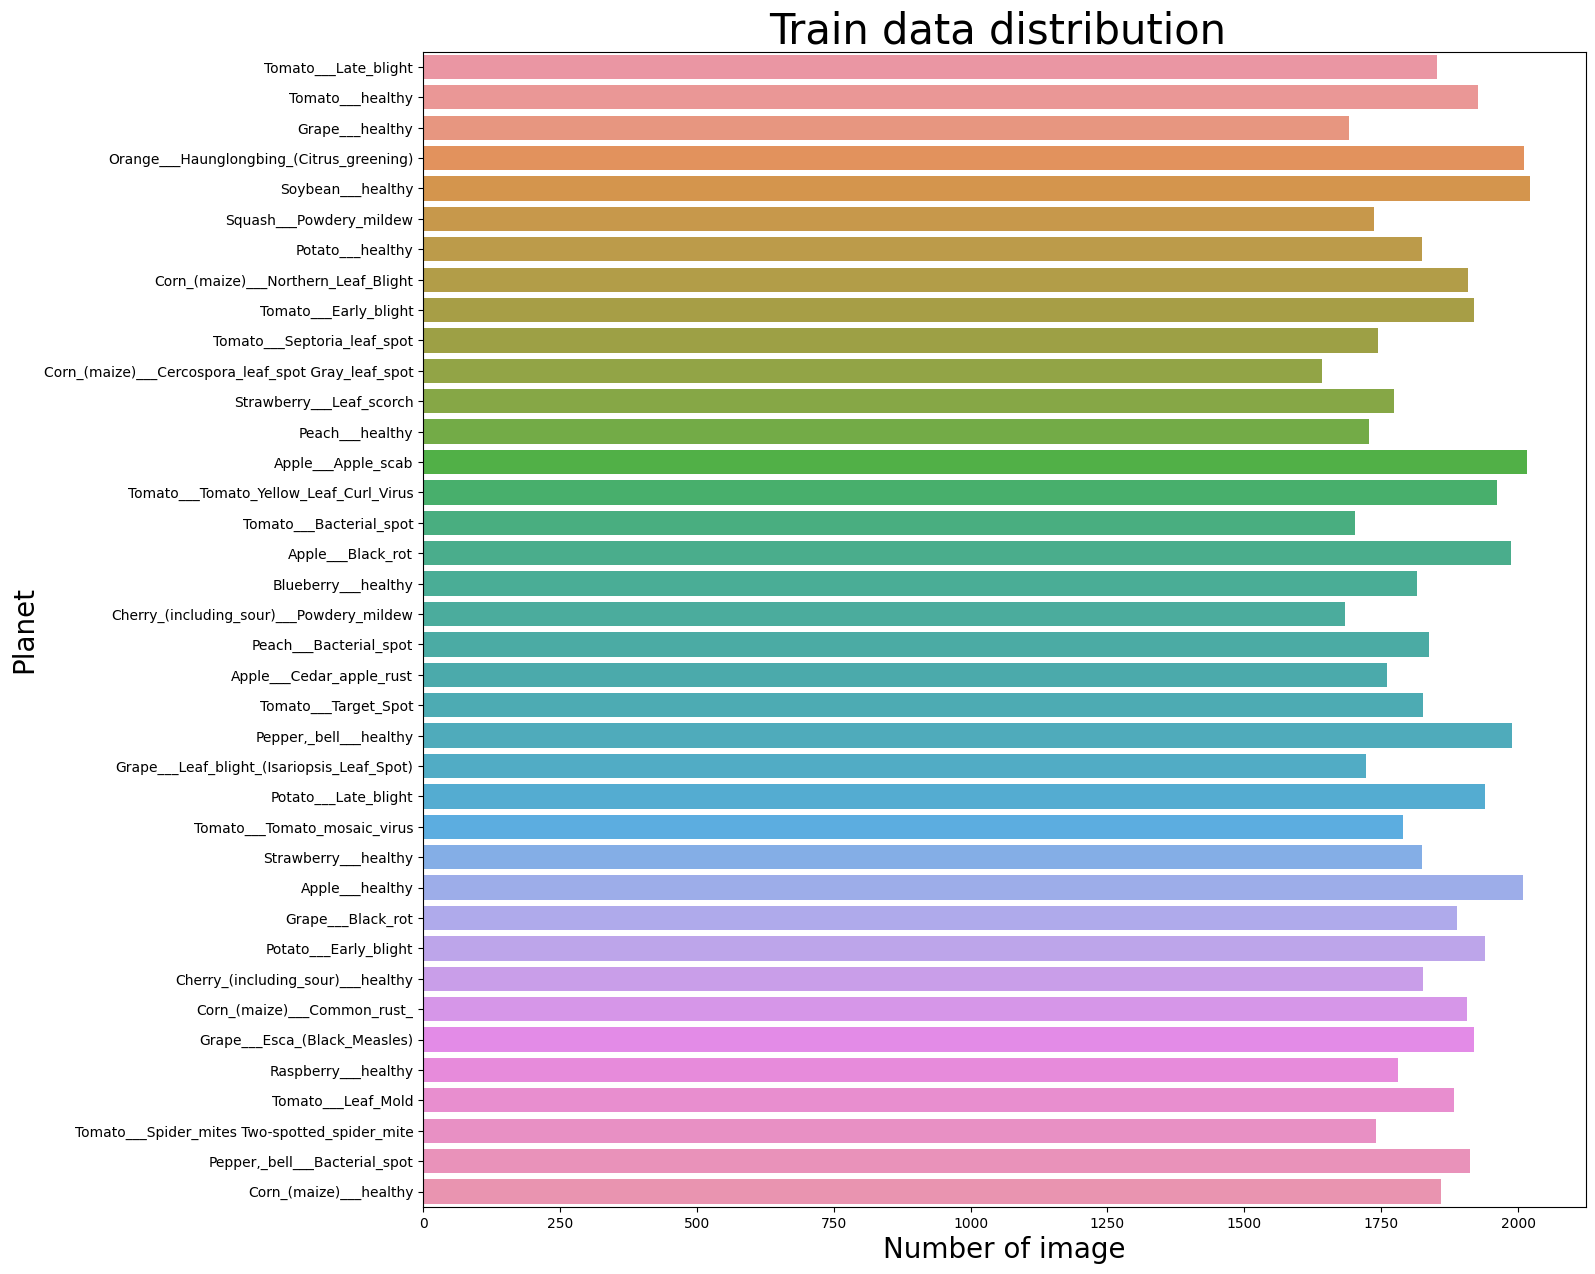

In [7]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(Number_Diseases.keys())
# get values in the same order as keys, and parse percentage values
vals = list(Number_Diseases.values())
sns.barplot(y=keys, x=vals)

In [8]:
Diseases = os.listdir(valid_path)
Number_Diseases_valid = {}
for i in Diseases:
    Number_Diseases_valid[i] = len(os.listdir(valid_path + '/' + i))
Dataset_valid = pd.DataFrame(Number_Diseases_valid.values(), index=Number_Diseases_valid.keys(), columns=["Number Of Diseases"])

In [9]:
Dataset_valid

,Number Of Diseases
Tomato___Late_blight,463
Tomato___healthy,481
Grape___healthy,423
Orange___Haunglongbing_(Citrus_greening),503
Soybean___healthy,505
Squash___Powdery_mildew,434
Potato___healthy,456
Corn_(maize)___Northern_Leaf_Blight,477
Tomato___Early_blight,480
Tomato___Septoria_leaf_spot,436


<AxesSubplot: title={'center': 'Train data distribution '}, xlabel='Number of image', ylabel='Planet'>

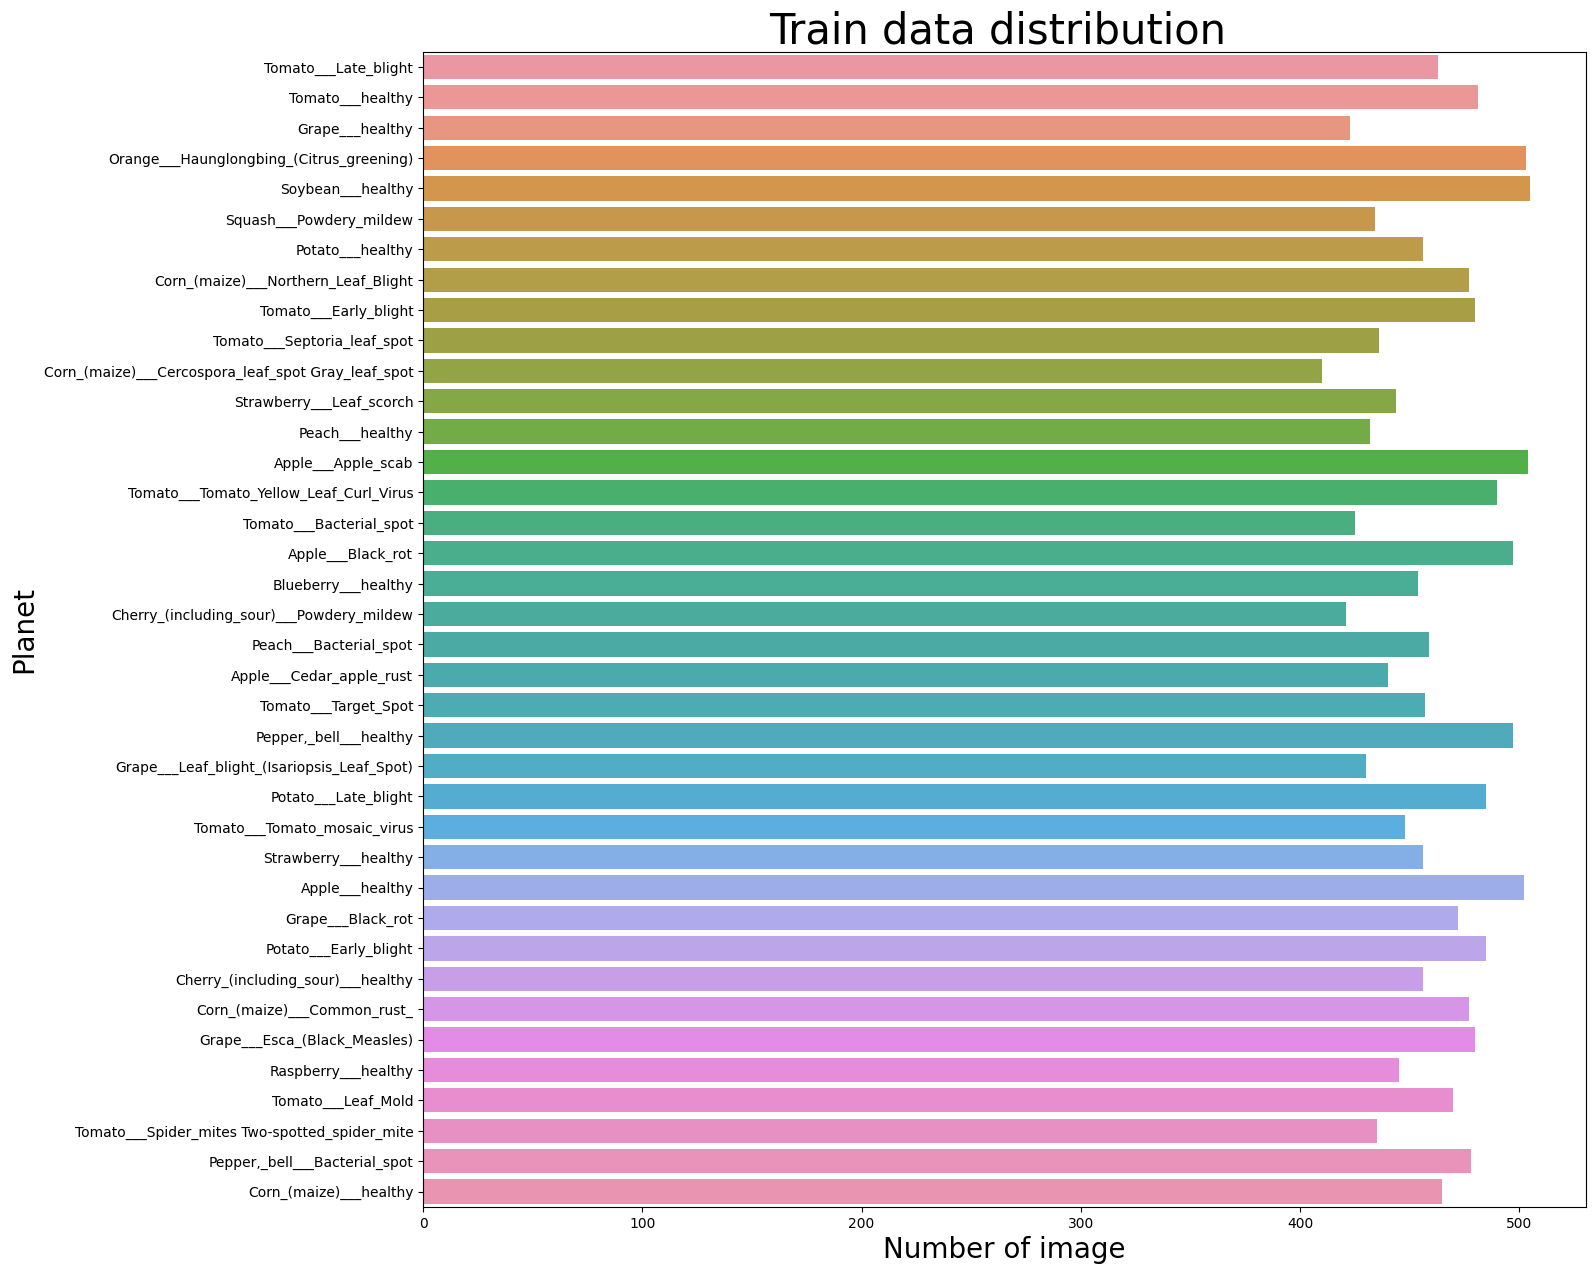

In [10]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Planet',fontsize=20)

keys = list(Number_Diseases_valid.keys())
# get values in the same order as keys, and parse percentage values
vals = list(Number_Diseases_valid.values())
sns.barplot(y=keys, x=vals)

In [11]:
# create the function to make plot the random image 
def show_image(path,Diseases = train.class_names):
    image = random.randint(0,len(Diseases)-1)
    select = random.choice(os.listdir(os.path.join(path,Diseases[image])))
    imagepath= os.path.join(path,Diseases[image],select)
    img = plt.imread(imagepath)
    plt.imshow(img)
    font=12
    plt.title(Diseases[image],fontdict={'fontsize': font})
    plt.axis(False)

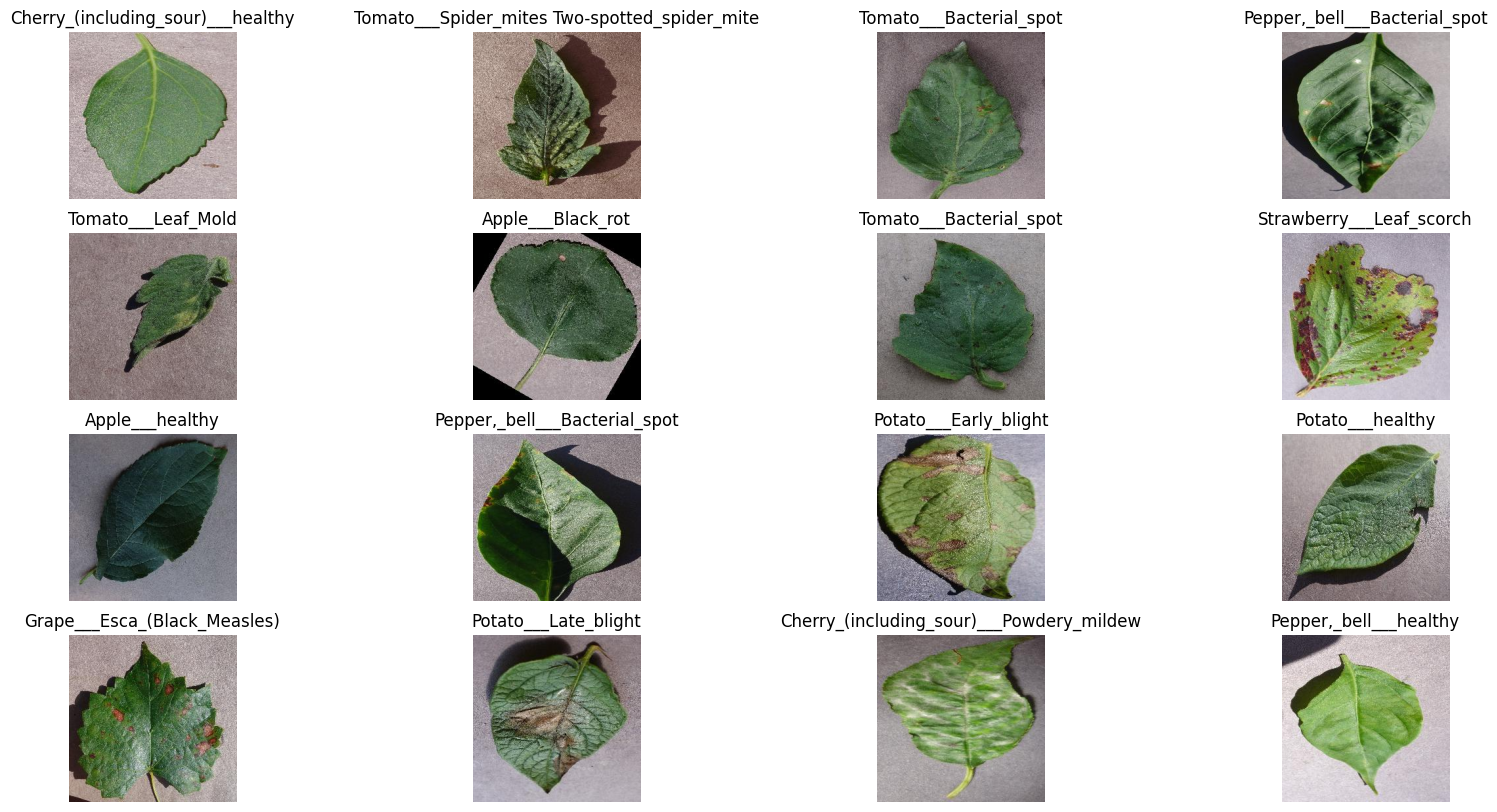

In [12]:
plt.figure(figsize=(20,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    show_image(train_path)

In [13]:
# Build the model CNN
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

# model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
# model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
# model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.40))

model.add(Dense(38,activation="softmax"))

In [14]:
model.compile(optimizer = Adam(learning_rate = 0.001) , loss = "categorical_crossentropy" , metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [16]:
# create callbacks
from keras.callbacks import ModelCheckpoint , EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5" , monitor = "val_accuracy" , mode = "max" , verbose = 1 , save_best_only = True)

In [17]:
history = model.fit(train , validation_data = valid , epochs = 10 , batch_size = 32 , callbacks = [checkpoint])

Epoch 1/10
2197/2197 [==============================] - ETA: 0s - loss: 1.4180 - accuracy: 0.5975
Epoch 1: val_accuracy improved from -inf to 0.82745, saving model to best_model.h5
2197/2197 [==============================] - 228s 102ms/step - loss: 1.4180 - accuracy: 0.5975 - val_loss: 0.5376 - val_accuracy: 0.8275
Epoch 2/10
2197/2197 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.8474
Epoch 2: val_accuracy improved from 0.82745 to 0.88766, saving model to best_model.h5
2197/2197 [==============================] - 186s 84ms/step - loss: 0.4779 - accuracy: 0.8474 - val_loss: 0.3475 - val_accuracy: 0.8877
Epoch 3/10
2197/2197 [==============================] - ETA: 0s - loss: 0.3042 - accuracy: 0.9009
Epoch 3: val_accuracy improved from 0.88766 to 0.90445, saving model to best_model.h5
2197/2197 [==============================] - 184s 84ms/step - loss: 0.3042 - accuracy: 0.9009 - val_loss: 0.3009 - val_accuracy: 0.9045
Epoch 4/10
2197/2197 [====================

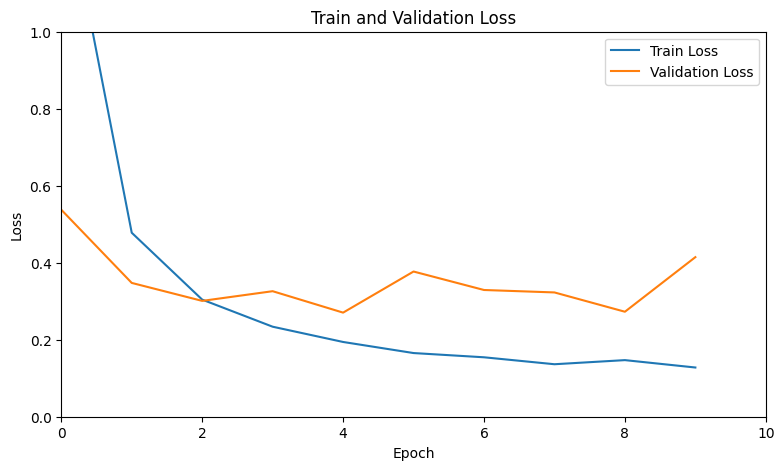

In [18]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

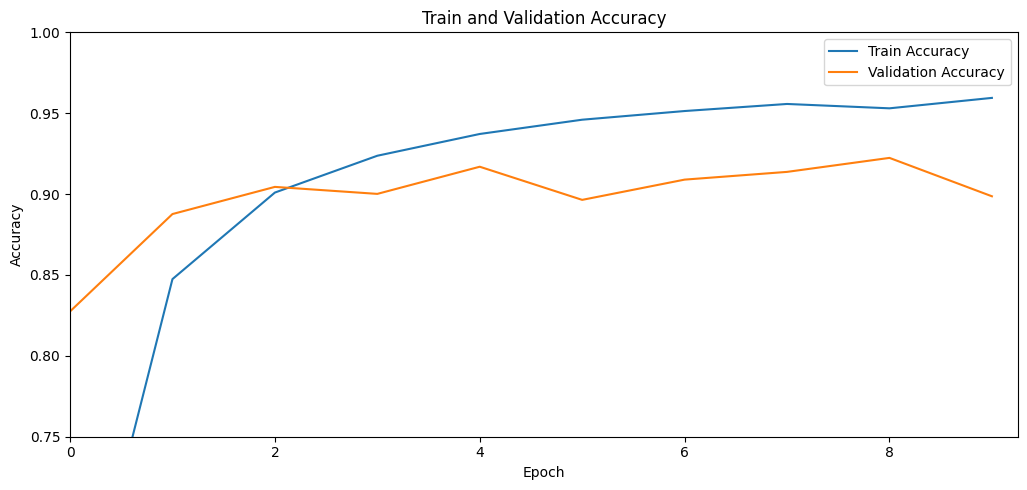

In [19]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [24]:
ModelLoss, ModelAccuracy = model.evaluate(valid)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

550/550 [==============================] - 26s 46ms/step - loss: 0.4145 - accuracy: 0.8986
Test Loss is 0.41448870301246643
Test Accuracy is 0.8986455798149109
